In [6]:
import numpy as np
import copy

sums_template = {
    'load_sums' : [],
    'bought_sums' : [],
    'pv_sums' : [],
    'sold_sums' : [],
    'wasted_sums' : []
}

all_sums= [copy.deepcopy(sums_template) for _ in range(4)]
all_labels = ['Priority', 'Prognosis','RL', 'RL Offset']
#all_labels = ['RL', 'Priorität', 'Priorität (Matlab)', 'Prognose (Matlab)']

for d, name_scheme in zip(all_sums, [
    '../simulation/mat_evaluations/{}_prio.csv',
    '../simulation/prog_evaluations/{}.csv',
    '../ml/evaluations/{}.csv',
    '../ml/evaluations_pboff/{}.csv',
    #'../ml/evaluations_pboff_4000/{}.csv',
    #'../simulation/prog_eval_no_bal/{}.csv',
    #'../simulation/mat_evaluations/{}_prio_mat.csv',
    #'../simulation/mat_evaluations/{}_prog.csv'
]):
    for i in range(100):
        data = np.genfromtxt(name_scheme.format(i), delimiter=';')
        d['load_sums'].append(np.sum(data[:,1]))
        d['pv_sums'].append(np.sum(data[:,2]))
        d['sold_sums'].append(np.sum(data[:,6]))
        d['bought_sums'].append(np.sum(data[:,5]))
        d['wasted_sums'].append(np.sum(data[:,7]))
        print(i)

    print('done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41

In [7]:
for l, d in zip(all_labels, all_sums):
    load_sums =  np.array(d['load_sums'])
    bought_sums = np.array(d['bought_sums'])
    pv_sums = np.array(d['pv_sums'])
    sold_sums = np.array(d['sold_sums'])
    wasted_sums = np.array(d['wasted_sums'])

    print(np.sum(pv_sums))
    print(np.sum(load_sums))

    d['pv_load_ratio'] = -pv_sums/load_sums
    d['svg'] = 1-bought_sums/load_sums
    d['ev'] = (-pv_sums-wasted_sums-sold_sums)/-pv_sums
    d['ar'] = wasted_sums/-pv_sums


print(all_sums[0]['pv_load_ratio'])
    
print('SVG:')
for l, d in zip(all_labels, all_sums):
    print('{:<18}: {:6f}  p0.25: {:6f}  p0.75: {:6f}'.format(l, np.mean(d['svg']), np.percentile(d['svg'], 25), np.percentile(d['svg'], 75)))

print('\n\nEVA:')
for l, d in zip(all_labels, all_sums):
    print('{:<18}: {:6f}  p0.25: {:6f}  p0.75: {:6f}'.format(l, np.mean(d['ev']), np.percentile(d['ev'], 25), np.percentile(d['ev'], 75)))
print('\n\nAR:')
for l, d in zip(all_labels, all_sums):
    print('{:<18}: {:6f}  p0.25: {:6f}  p0.75: {:6f}'.format(l, np.mean(d['ar']), np.percentile(d['ar'], 25), np.percentile(d['ar'], 75)))

-267131383312.83652
207533649720.0
-267131383312.83652
207533649720.0
-267131383312.83652
207533649720.0
-267131383312.83652
207533649720.0
[0.24020496 0.25122015 1.24422621 2.85855696 0.595286   1.52756937
 2.12219489 0.46999631 3.19002343 0.31745257 0.96200604 2.02393003
 0.47941713 0.70269649 0.55781037 1.53436494 0.58031717 2.25782046
 0.39583742 2.6159476  1.42409329 0.71597317 1.00774528 0.65365287
 1.86357783 2.75482569 0.45915041 2.14775961 0.24793039 2.256457
 1.40755741 3.74594349 0.25047136 2.60080447 0.47573909 2.58772097
 1.69247689 2.63513509 0.68197742 2.42680774 0.37382205 0.82599943
 2.53835784 2.82579942 4.28424691 2.75947349 2.00711352 0.82888384
 0.29973199 2.09853587 2.45335611 0.61588028 0.54813609 2.65279767
 1.17999531 3.31671215 2.39569762 2.45674386 0.62088904 2.05155137
 2.45780313 0.35325917 1.64887432 1.27063469 0.49496138 2.31019109
 0.13969022 0.43597335 0.21830874 0.75556838 1.93992382 1.32881201
 0.86445224 0.53350592 3.18400013 0.43608825 0.16933976 3.

1.4222582755064783
1.4222582755064783
1.4222582755064783
1.4222582755064783


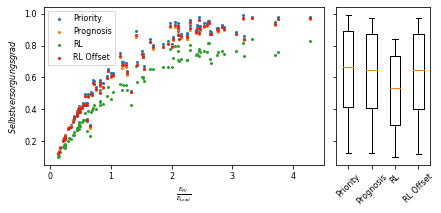

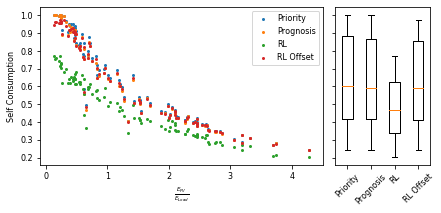

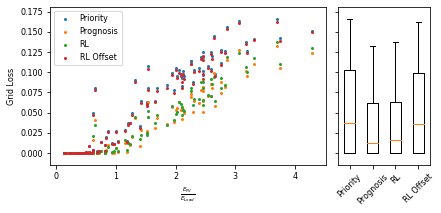

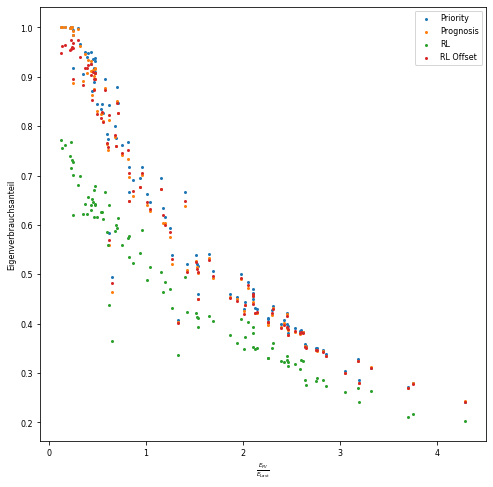

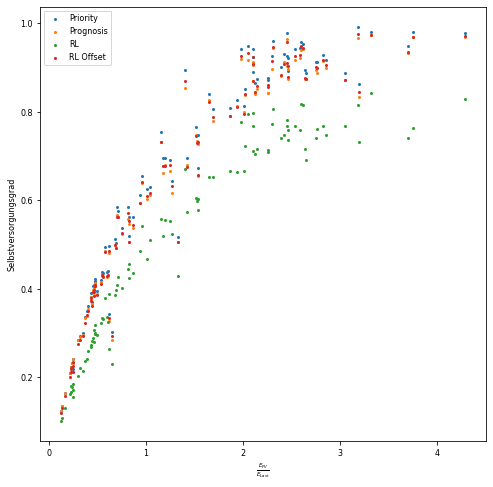

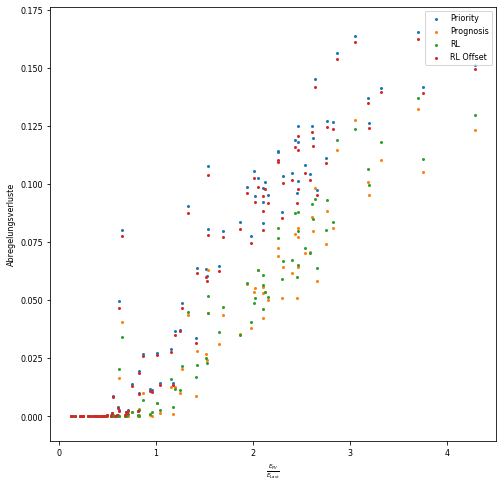

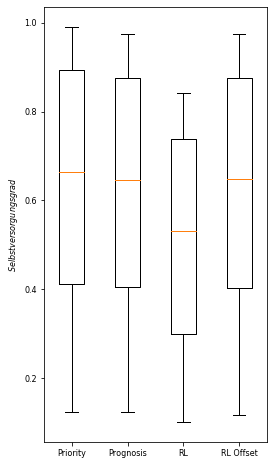

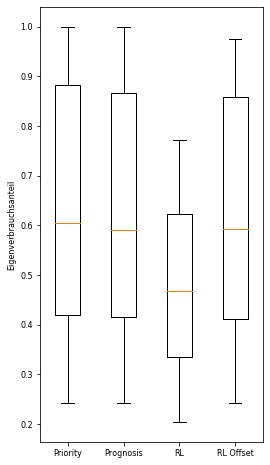

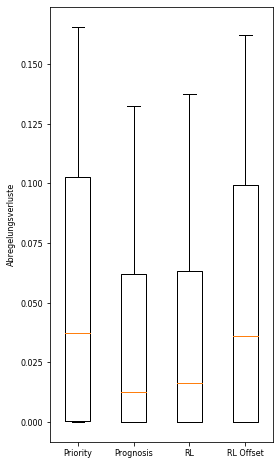

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8,'lines.markersize':2})

fig, (ax1, ax2) = plt.subplots(1,2 , sharey=True, figsize=(6.2,3), gridspec_kw={'width_ratios': [3, 1]})
for d in all_sums:
    print(np.mean(d['pv_load_ratio']))
    ax1.scatter(d['pv_load_ratio'], d['svg'])
ax1.set_xlabel('$\\frac{E_{PV}}{E_{Load}}$')
ax1.set_ylabel('$Selbstversorgungsgrad$')
ax1.legend(all_labels)

ax2.boxplot(
    [d['svg'] for d in all_sums],
    labels=all_labels
)
for tl in ax2.get_xticklabels(): tl.set_rotation(45)
plt.tight_layout()
plt.savefig('////home/florus/Pictures/Veroeffentlichung/sv.pdf')

fig, (ax1, ax2) = plt.subplots(1,2 , sharey=True, figsize=(6.2,3), gridspec_kw={'width_ratios': [3, 1]})
for d in all_sums:
    ax1.scatter(d['pv_load_ratio'], d['ev'])
ax1.set_xlabel('$\\frac{E_{PV}}{E_{Load}}$')
ax1.set_ylabel('Self Consumption')
ax1.legend(all_labels)

ax2.boxplot(
    [d['ev'] for d in all_sums],
    labels=all_labels
)
for tl in ax2.get_xticklabels(): tl.set_rotation(45)
plt.tight_layout()
plt.savefig('////home/florus/Pictures/Veroeffentlichung/ev.pdf')

fig, (ax1, ax2) = plt.subplots(1,2 , sharey=True, figsize=(6.2,3), gridspec_kw={'width_ratios': [3, 1]})
for d in all_sums:
    ax1.scatter(d['pv_load_ratio'], d['ar'])
ax1.set_xlabel('$\\frac{E_{PV}}{E_{Load}}$')
ax1.set_ylabel('Grid Loss')
ax1.legend(all_labels)

ax2.boxplot(
    [d['ar'] for d in all_sums],
    labels=all_labels
)
for tl in ax2.get_xticklabels(): tl.set_rotation(45)
plt.tight_layout()
plt.savefig('////home/florus/Pictures/Veroeffentlichung/ar.pdf')


fig, ax = plt.subplots(figsize=(8,8))
for d in all_sums:
    ax.scatter(d['pv_load_ratio'], d['ev'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('Eigenverbrauchsanteil')
ax.legend(all_labels)


fig, ax = plt.subplots(figsize=(8,8))
for d in all_sums:
    ax.scatter(d['pv_load_ratio'], d['svg'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('Selbstversorgungsgrad')
ax.legend(all_labels)

fig, ax = plt.subplots(figsize=(8,8))
for d in all_sums:
    ax.scatter(d['pv_load_ratio'], d['ar'])
ax.set_xlabel('$\\frac{E_{PV}}{E_{Last}}$')
ax.set_ylabel('Abregelungsverluste')

ax.legend(all_labels)



fig, ax = plt.subplots(figsize=(4,8))
ax.boxplot(
    [d['svg'] for d in all_sums],
    labels=all_labels
)
ax.set_ylabel('$Selbstversorgungsgrad$')

fig, ax = plt.subplots(figsize=(4,8))
ax.boxplot(
    [d['ev'] for d in all_sums],
    labels=all_labels)
ax.set_ylabel('Eigenverbrauchsanteil')

fig, ax = plt.subplots(figsize=(4,8))
ax.boxplot(
    [d['ar'] for d in all_sums],
    labels=all_labels)
ax.set_ylabel('Abregelungsverluste')

plt.show()

In [ ]:
for d in all_sums:
    energy_cost = np.array(d['bought_sums'])*0.3 - np.array(d['sold_sums'])*0.1
    print(np.mean(energy_cost))

132545158.37404951
130406627.98960346
173234805.32589555
137386805.8576815
